In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
flights = sns.load_dataset("flights")
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

### Gráfico de linhas

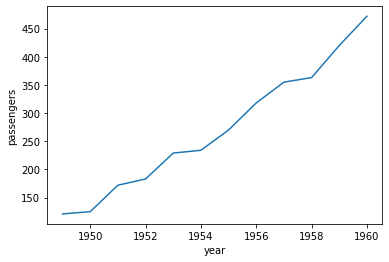

In [3]:
may_flights = flights.query("month == 'May'")
sns.lineplot(data=may_flights, x="year", y="passengers")
plt.show()

In [4]:
may_flights

year month  passengers
4    1949   May         121
16   1950   May         125
28   1951   May         172
40   1952   May         183
52   1953   May         229
64   1954   May         234
76   1955   May         270
88   1956   May         318
100  1957   May         355
112  1958   May         363
124  1959   May         420
136  1960   May         472

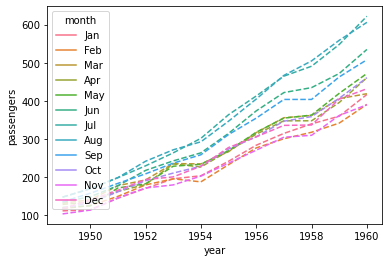

In [5]:
sns.lineplot(data=flights, x="year", y="passengers", hue="month", linestyle='dashed')
plt.show()

### Gráfico em barras

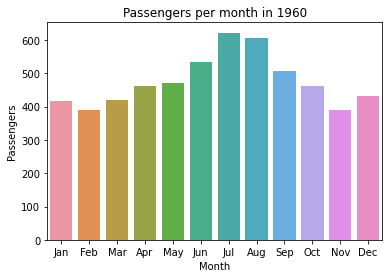

In [6]:
sns.barplot(data=flights.loc[flights['year']==1960], x='month', y='passengers')
plt.title('Passengers per month in 1960')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()

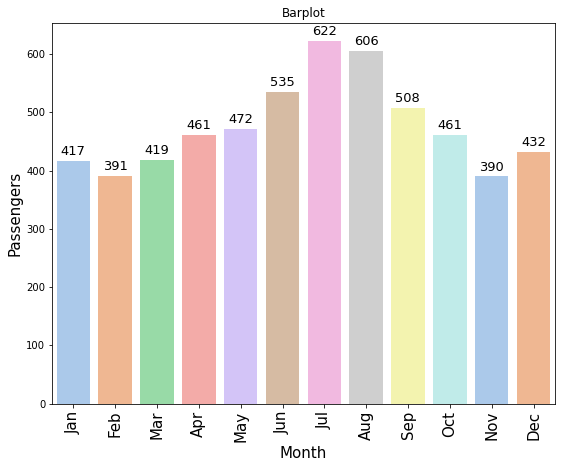

In [7]:
plt.figure(figsize=(9, 7))

ax = sns.barplot(data=flights.loc[flights['year']==1960], x='month', y='passengers', palette='pastel')

# Vira o eixo x em 90°
plt.xticks(rotation=90, fontsize = 15)

for p in ax.patches:
    #print(p)
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height()+10), fontsize = 13)
    #ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height()+10), rotation = 90, fontsize = 13)
    
plt.title("Barplot")
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Passengers", fontsize = 15)
plt.show()

In [8]:
df = sns.load_dataset('tips')
male = df[df['sex'] == 'Male']
female = df[df['sex'] == 'Female']
df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

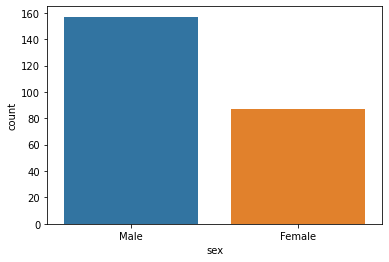

In [9]:
sns.countplot(x=df.sex ,data=df)
#sns.countplot(y=df.sex ,data=df)
plt.show()

In [10]:
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

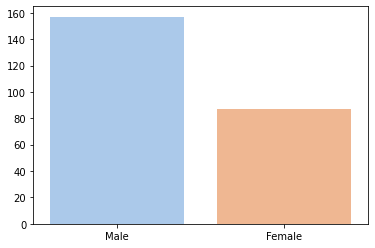

In [11]:
ax = sns.barplot(data=df, x=df['sex'].value_counts().keys(), y=df['sex'].value_counts().values, palette='pastel')

### Gráfico de dispersão

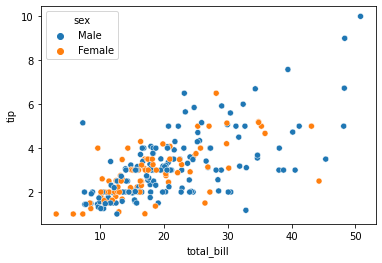

In [12]:
sns.scatterplot(data=df, x='total_bill', y='tip', hue='sex')
plt.show()

In [13]:
df['size'].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

In [14]:
df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

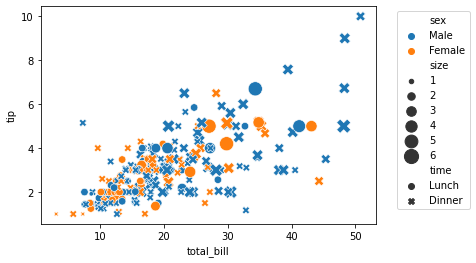

In [15]:
sns.scatterplot(
        data=df, x='total_bill', y='tip', hue='sex', 
        style="time", size='size', sizes=(20, 200)
    )

plt.legend(bbox_to_anchor=(1.05, 1), loc = 2)
plt.show()

### Boxplot

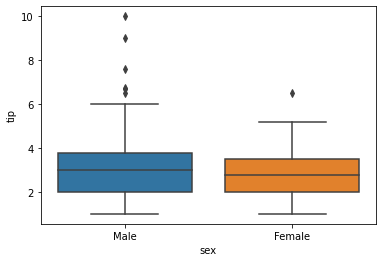

In [16]:
sns.boxplot(data = df,y = 'tip',x = 'sex')
plt.show()

### Gráfico de pizza

In [17]:
df.groupby('time').sum()

C:\Users\TALMEI~1\AppData\Local\Temp/ipykernel_19288/3260730903.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('time').sum()


total_bill     tip  size
time                            
Lunch      1167.47  185.51   164
Dinner     3660.30  546.07   463

In [18]:
pie_df = df.groupby('time').sum()
pie_df

C:\Users\TALMEI~1\AppData\Local\Temp/ipykernel_19288/3388813332.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pie_df = df.groupby('time').sum()


total_bill     tip  size
time                            
Lunch      1167.47  185.51   164
Dinner     3660.30  546.07   463

In [19]:
colors = sns.color_palette('pastel')[0:5]

plt.pie(x = pie_df['total_bill'], labels = pie_df.index, colors = colors, autopct='%.0f%%')
plt.show()

### Gráfico de histograma

In [20]:
sns.histplot(data=df, x="day", kde=True)

<AxesSubplot:xlabel='day', ylabel='Count'>

### Matriz de correlação

C:\Users\TALMEI~1\AppData\Local\Temp/ipykernel_19288/3411767231.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<AxesSubplot:>

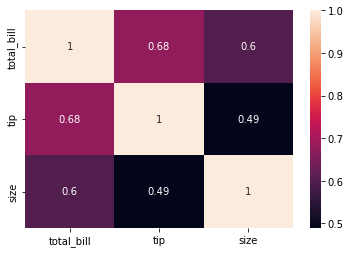

In [21]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

### Base de dados Íris

In [22]:
df_iris = sns.load_dataset("iris")
df_iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

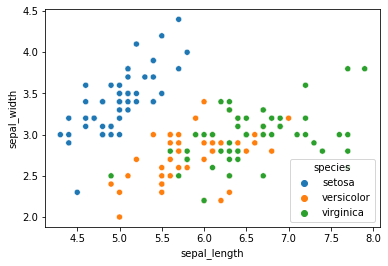

In [23]:
sns.scatterplot(data=df_iris,  x='sepal_length', y='sepal_width', hue='species') 

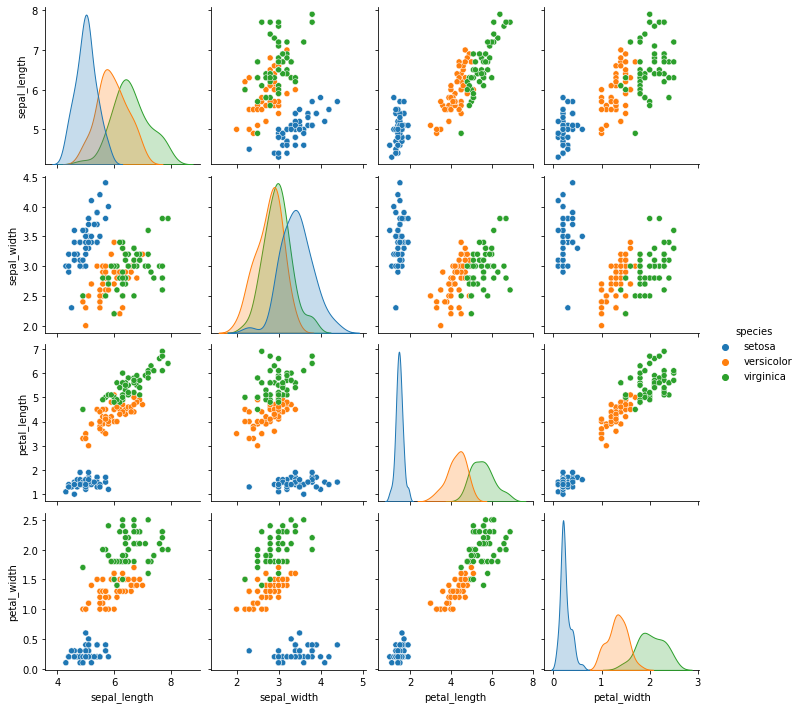

In [24]:
# Traçar relacionamentos aos pares em um conjunto de dados
sns.pairplot(df_iris, hue='species') 

In [25]:
# Matriz de correlação
corr_matrix = df_iris.corr()
sns.heatmap(corr_matrix, annot=True,cmap='summer')

C:\Users\TALMEI~1\AppData\Local\Temp/ipykernel_19288/1624780324.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_iris.corr()


<AxesSubplot:>

In [26]:
# Subplots
fig, ax = plt.subplots(2, 2, figsize=(15,10))

sns.boxplot(x='species',y='sepal_length',data=df_iris, ax=ax[0][0])
sns.boxplot(x='species',y='sepal_width',data=df_iris, ax=ax[0][1])
sns.boxplot(x='species',y='petal_length',data=df_iris, ax=ax[1][0])
sns.boxplot(x='species',y='petal_width',data=df_iris, ax=ax[1][1])

<AxesSubplot:xlabel='species', ylabel='petal_width'>

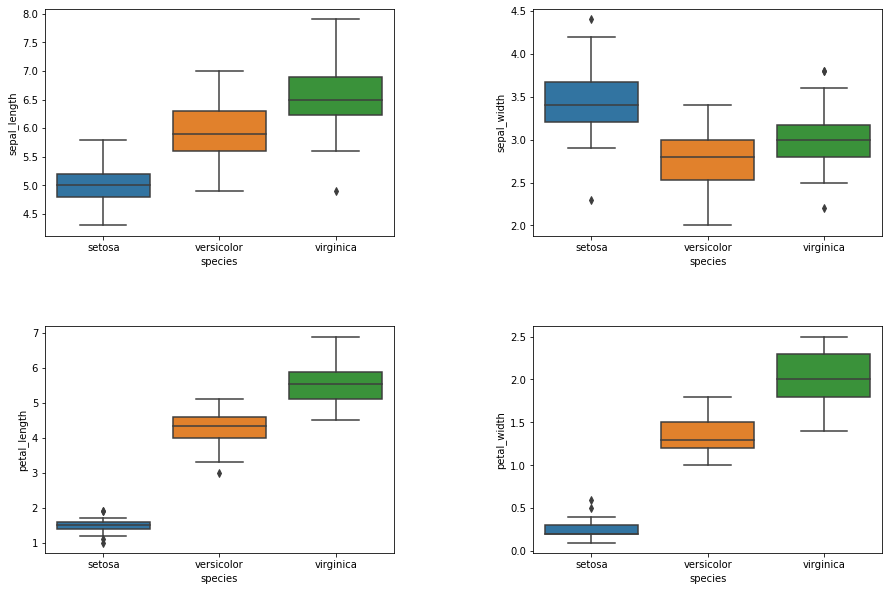

In [27]:
# Subplots
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plot1 = plt.subplot(2, 2, 1)
sns.boxplot(x='species',y='sepal_length',data=df_iris)

plot2 = plt.subplot(2, 2, 2)
sns.boxplot(x='species',y='sepal_width',data=df_iris)

plot3 = plt.subplot(2, 2, 3)
sns.boxplot(x='species',y='petal_length',data=df_iris)

plot3 = plt.subplot(2, 2, 4)
sns.boxplot(x='species',y='petal_width',data=df_iris)

plt.show()